<a href="https://colab.research.google.com/github/Gstclair1/Launch-Data/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 14.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import iso3166 as iso
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches_updated.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
rows = df_data.shape[0]
columns = df_data.shape[1]
print(f"There are {rows} rows and {columns} columns")
f"The column names are: {df_data.columns}"

In [ ]:
print(df_data.isna())
df_data.duplicated()



      Unnamed: 0  Organisation  Location  Datetime  Details  Status  Price  \
0          False         False     False     False    False   False  False   
1          False         False     False     False    False   False  False   
2          False         False     False     False    False   False  False   
3          False         False     False     False    False   False  False   
4          False         False     False     False    False   False  False   
...          ...           ...       ...       ...      ...     ...    ...   
6182       False         False     False     False    False   False   True   
6183       False         False     False     False    False   False   True   
6184       False         False     False     False    False   False   True   
6185       False         False     False     False    False   False   True   
6186       False         False     False     False    False   False   True   

      Mission_status  
0              False  
1              Fa

0       False
1       False
2       False
3       False
4       False
        ...  
6182    False
6183    False
6184    False
6185    False
6186    False
Length: 6187, dtype: bool

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
clean_df = df_data.dropna()


In [ ]:
clean_df.drop(columns=['Unnamed: 0'], inplace=True)
clean_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,Arianespace,"ELV-1, Guiana Space Centre, French Guiana, France","Tue Aug 17, 2021 01:47 UTC","Vega | Pléiades-Néo 4, BRO-4 & Others",Active,37.00,Success
1,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Thu Aug 12, 2021 00:13 UTC",GSLV Mk II | EOS-03,Active,47.00,Failure
2,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA","Tue Aug 10, 2021 22:01 UTC",Antares 230+ | Cygnus CRS NG-16,Active,85.00,Success
3,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Aug 05, 2021 16:30 UTC",Long March 3B/E | Zhongxing-2E,Active,29.15,Success
4,CASC,"LC-16, Taiyuan Satellite Launch Center, China","Wed Aug 04, 2021 11:01 UTC",Long March 6 | KL-Beta A & B,Active,19.00,Success


## Descriptive Statistics

In [ ]:
print("Breakdown of cost variety:")
clean_df["Price"].describe()

Breakdown of cost variety:


count   2,201.00
mean       71.79
std       107.98
min         2.50
25%        20.00
50%        29.75
75%        64.68
max       450.00
Name: Price, dtype: float64

In [ ]:
print("Breakdown of variety of organisations:")
clean_df["Organisation"].describe()

Breakdown of variety of organisations:


count          2201
unique           29
top       RVSN USSR
freq            657
Name: Organisation, dtype: object

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
clean_df["Organisation"].value_counts().plot(kind="bar")

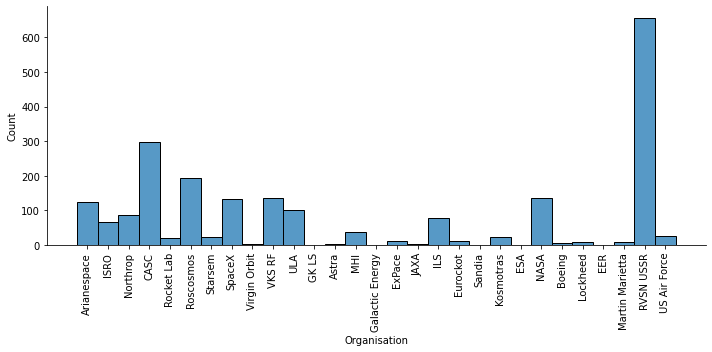

In [ ]:
sns.displot(data=clean_df, x="Organisation", aspect=2)
plt.xticks(rotation=90)
plt.tight_layout()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

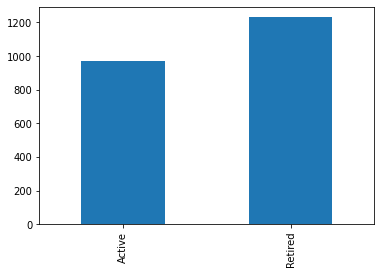

In [ ]:
clean_df["Status"].value_counts().sort_values().plot(kind="bar")

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

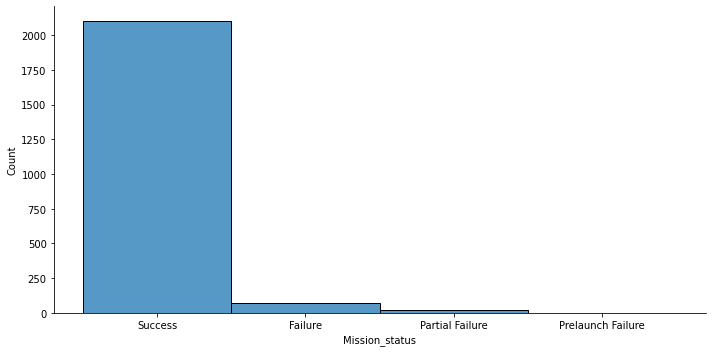

In [ ]:
sns.displot(data=clean_df, x="Mission_status", aspect=2)

# How Expensive are the Launches? 


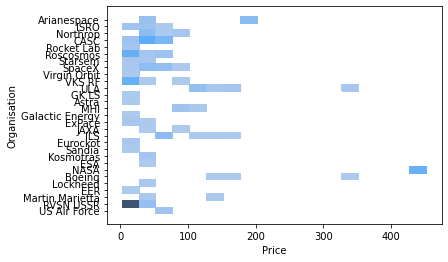

In [ ]:
sns.histplot(data=clean_df, x="Price",y="Organisation", binwidth=25)

In [ ]:
px.histogram(clean_df.sort_values(by=["Organisation","Price"], ascending=[False, False]), x="Price", y="Organisation")


# Use a Choropleth Map to Show the Number of Launches by Country


In [ ]:
clean_df["Country"] = clean_df["Location"].str.split(", ").str[-1]

clean_df.loc[(clean_df["Country"] == 'Russia'), "Country"] = "Russian Federation"
clean_df.loc[(clean_df["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
clean_df.loc[(clean_df["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"
clean_df.loc[(clean_df["Country"] == 'New Mexico'), "Country"] = "USA"
clean_df.loc[(clean_df["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
clean_df.loc[(clean_df["Country"] == 'Gran Canaria'), "Country"] = "USA"
clean_df.loc[(clean_df["Country"] == 'Yellow Sea'), "Country"] = "China"
clean_df.loc[(clean_df["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
clean_df.loc[(clean_df["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
clean_df.loc[(clean_df["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
clean_df.loc[(clean_df["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"

countries = {country.name: key for key, country in iso.countries_by_alpha3.items()}
clean_df = clean_df.replace({"Country": countries})
launches = clean_df["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Country,counts
0,RUS,1118
1,USA,514
2,CHN,309
3,FRA,124
4,IND,68


In [ ]:
fig = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.matter)
fig.update_layout(coloraxis_showscale=True)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
status = clean_df.groupby("Country")["Mission_status"].value_counts().rename_axis(["Country","Status"]).reset_index(name='counts')
failures = status[status["Status"].str.contains("Fail")].groupby("Country").sum()
failures.head()

,counts
Country,
CHN,10
FRA,5
IND,9
MHL,3
NZL,3


In [ ]:
fig = px.choropleth(failures, locations=failures.index, color="counts", color_continuous_scale=px.colors.sequential.matter)
fig.update_layout(coloraxis_showscale=True)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
sunbur = clean_df.groupby(by=["Country","Organisation","Mission_status"], as_index=False).size()
sunbur = sunbur.sort_values("size", ascending=False)

In [ ]:
fig = px.sunburst(
    clean_df,
    path = ['Country','Organisation','Mission_status'],
    title = "Mission Status by Country",
    hover_data=['Organisation']
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
tot_money_spent = clean_df.groupby("Organisation")["Price"].sum().reset_index()
tot_money_spent.sort_values(by="Price", ascending=False, inplace=True)
tot_money_spent.head()

,Organisation,Price
17,NASA,"61,200.00"
0,Arianespace,"17,386.00"
25,ULA,"15,747.00"
19,RVSN USSR,"14,200.00"
3,CASC,"12,079.56"


Text(0, 0.5, 'Total Money Spent in Millions')

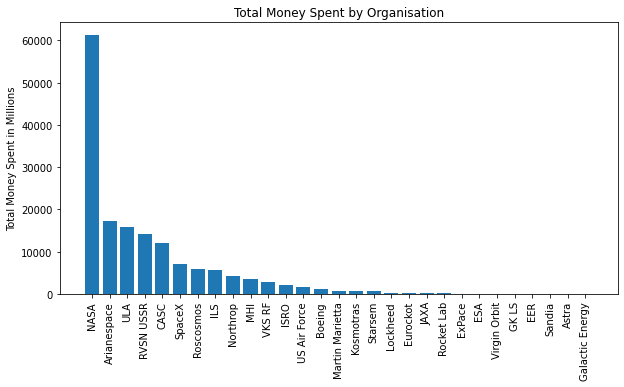

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(data=tot_money_spent, x="Organisation", height="Price")
plt.title("Total Money Spent by Organisation")
plt.xticks(rotation=90)
plt.ylabel("Total Money Spent in Millions")

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
avg_money_spent = clean_df.groupby("Organisation")["Price"].mean().reset_index()
avg_money_spent.sort_values(by="Price", ascending=False, inplace=True)
avg_money_spent.head()

,Organisation,Price
17,NASA,450.00
2,Boeing,177.29
25,ULA,154.38
0,Arianespace,141.35
15,MHI,95.47


Text(0, 0.5, 'Average Money Spent in Millions')

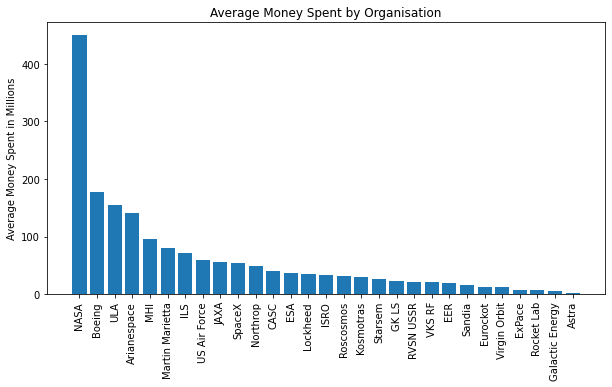

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(data=avg_money_spent, x="Organisation", height="Price")
plt.title("Average Money Spent by Organisation")
plt.xticks(rotation=90)
plt.ylabel("Average Money Spent in Millions")

# Chart the Number of Launches per Year

In [ ]:
clean_df['date'] = pd.to_datetime(df_data['Datetime'])
clean_df['year'] = clean_df['date'].apply(lambda datetime: datetime.year)

per_year = clean_df['year'].value_counts().reset_index()
per_year.columns = [
    'year', 
    'count'
]

In [ ]:
fig = px.bar(
    per_year, 
    x='year', 
    y="count", 
    orientation='v', 
    title='Missions by year',
    labels={
        "year": "Year",
        "count": "Number of Missions"
    } 

)
fig.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
clean_df['date'] = pd.to_datetime(df_data['Datetime'])
clean_df['month'] = clean_df['date'].apply(lambda datetime: datetime.month)

per_month = clean_df['month'].value_counts().reset_index()
per_month.columns = [
    'month', 
    'count'
]

In [ ]:
fig = px.bar(
    per_month, 
    x='month', 
    y="count", 
    orientation='v', 
    title='Missions by Month',
    labels={
        "month": "Month (Numerical)",
        "count": "Number of Missions",
    },
)

fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
most_launches = per_month['count'].max()
per_month.sort_values(by="count", ascending=False)
month =  per_month.max()['month']
print("Most launches in a month is", most_launches, f"in month number {month}")


Most launches in a month is 223 in month number 12


In [ ]:
least_launches = per_month['count'].min()
per_month.sort_values(by="count", ascending=False)
month =  per_month.min()['month']
print("Fewest launches in a month is", least_launches, f"in month number {month}")


Fewest launches in a month is 134 in month number 1


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

Text(0, 0.5, 'Average Price inn Millions')

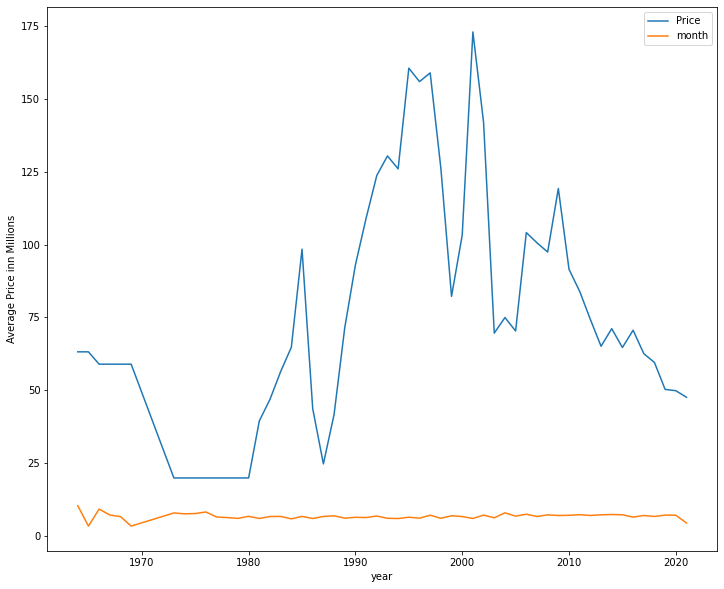

In [ ]:
clean_df.groupby("year").mean().plot(figsize=(12,10))
plt.ylabel("Average Price inn Millions")

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:

top_10=pd.DataFrame(columns=clean_df.columns)
for value in clean_df.groupby("Organisation").count().sort_values("Datetime",ascending=False)[:10].index:
  print(value)
  org=clean_df[clean_df.Organisation==value]
  top_10=top_10.append(org,ignore_index=False, verify_integrity=False, sort=None)
top_10

df_data[df_data.Organisation=="CASC"]

top_10.groupby("Organisation").count().sort_values("Datetime",ascending=False)[:10].index

px.histogram(top_10.sort_values(by=["Organisation", "Datetime"], ascending=[True, False]), x="Organisation",nbins=10) 

RVSN USSR
CASC
Roscosmos
VKS RF
NASA
SpaceX
Arianespace
ULA
Northrop
ILS


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
cwsr = clean_df[(clean_df['Country']=='USA') | (clean_df['Country']=='RUS')]
cwsr.head()

,Organisation,Location,Datetime,Details,Status,Price,Mission_status,Country,date,year,month
2,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA","Tue Aug 10, 2021 22:01 UTC",Antares 230+ | Cygnus CRS NG-16,Active,85.00,Success,USA,2021-08-10 22:01:00+00:00,2021,8
9,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Wed Jul 21, 2021 14:58 UTC",Proton-M | MLM-U Nauka,Active,65.00,Success,RUS,2021-07-21 14:58:00+00:00,2021,7
17,Starsem,"Site 1S, Vostochny Cosmodrome, Russia","Thu Jul 01, 2021 12:48 UTC",Soyuz 2.1b/Fregat | OneWeb #8,Active,25.00,Success,RUS,2021-07-01 12:48:00+00:00,2021,7
18,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Wed Jun 30, 2021 19:31 UTC",Falcon 9 Block 5 | Transporter 2,Active,50.00,Success,USA,2021-06-30 19:31:00+00:00,2021,6
19,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Wed Jun 30, 2021 14:47 UTC","LauncherOne | Tubular Bells, Part One",Active,12.00,Success,USA,2021-06-30 14:47:00+00:00,2021,6


In [ ]:
cw_yrs = cwsr.sort_values('year')
cw_yrs[(cw_yrs.year <= 1991)]

,Organisation,Location,Datetime,Details,Status,Price,Mission_status,Country,date,year,month
5817,US Air Force,"SLC-20, Cape Canaveral SFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,Retired,63.23,Failure,USA,1964-09-01 15:00:00+00:00,1964,9
5786,US Air Force,"SLC-20, Cape Canaveral SFS, Florida, USA","Thu Dec 10, 1964 16:53 UTC",Titan IIIA | Transtage 2,Retired,63.23,Success,USA,1964-12-10 16:53:00+00:00,1964,12
5740,US Air Force,"SLC-20, Cape Canaveral SFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,Retired,63.23,Success,USA,1965-05-06 15:00:00+00:00,1965,5
5770,US Air Force,"SLC-20, Cape Canaveral SFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,Retired,63.23,Success,USA,1965-02-11 15:19:00+00:00,1965,2
5574,US Air Force,"SLC-4W, Vandenberg SFB, California, USA","Fri Jul 29, 1966 18:30 UTC",Titan IIIB | KH-8,Retired,59.00,Success,USA,1966-07-29 18:30:00+00:00,1966,7
...,...,...,...,...,...,...,...,...,...,...,...
2520,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Tue May 21, 1991 08:59 UTC",Soyuz U | Resurs-F,Retired,20.00,Success,RUS,1991-05-21 08:59:00+00:00,1991,5
2519,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Fri May 24, 1991 15:29 UTC",Soyuz U | Cosmos 2149,Retired,20.00,Success,RUS,1991-05-24 15:29:00+00:00,1991,5
2517,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Thu May 30, 1991 08:04 UTC",Soyuz U2 | Progress M-8,Retired,40.00,Success,RUS,1991-05-30 08:04:00+00:00,1991,5
2529,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Fri Apr 05, 1991 14:22 UTC",Space Shuttle Atlantis | STS-37,Retired,450.00,Success,USA,1991-04-05 14:22:00+00:00,1991,4


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
tot_launch = cwsr["Country"].value_counts().rename_axis("Country").reset_index(name="counts")
tot_launch.head()

,Country,counts
0,RUS,1118
1,USA,514


In [ ]:
fig = px.pie(
    tot_launch,
    names="Country",
    values='counts'
)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

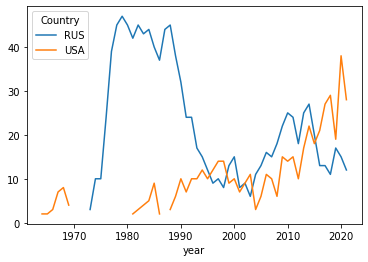

In [ ]:
cw_yrs.groupby(["year","Country"]).size().unstack().plot()


In [ ]:

tot_yr = cw_yrs.groupby(['year','Country']).size().unstack()
fig = px.bar(
    tot_yr,
    barmode='group',
)
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
status = clean_df.groupby(['year','Mission_status']).size().unstack()

failures = status['Failure']
fig=px.bar(
    failures
)
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

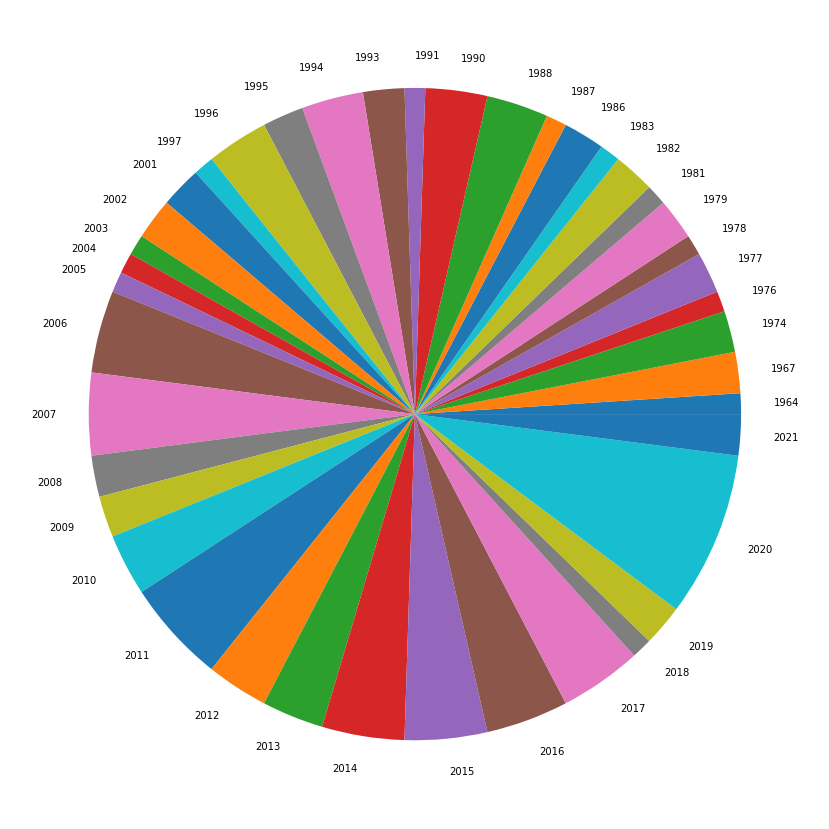

In [ ]:
sp_df = clean_df[clean_df['Mission_status'].str.contains("Failure")]
grouping = sp_df.groupby("year").count().reset_index()
failures = grouping['Mission_status']
year = grouping['year']

plt.pie(failures, labels = year)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
country_launches = clean_df.groupby("year")["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')
country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]
country_launches.head()

,year,Country,counts
0,1964,USA,2
1,1965,USA,2
2,1966,USA,3
3,1967,USA,7
4,1968,USA,8


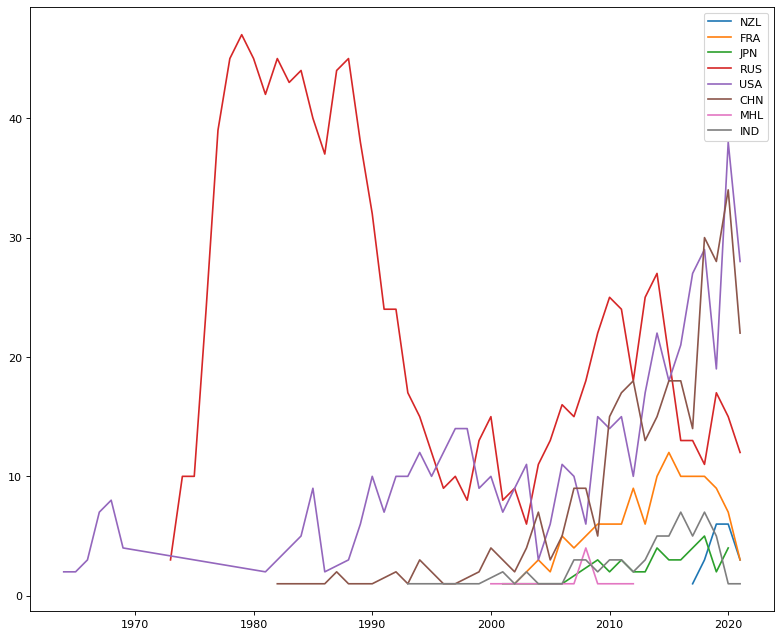

In [ ]:
count_set = set(country_launches['Country'])

plt.figure(figsize=(12, 10), dpi=80)
for count in count_set:
     selected_data = country_launches.loc[country_launches['Country'] == count]
     plt.plot(selected_data['year'], selected_data['counts'], label=count)
   
plt.legend()
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
org_launches = clean_df.groupby("year")["Organisation"].value_counts().rename_axis(["year", "Organisation"]).reset_index(name='counts')

org_launches.loc[org_launches.groupby("year")["counts"].idxmax()]
org_launches.head()

,year,Organisation,counts
0,1964,US Air Force,2
1,1965,US Air Force,2
2,1966,US Air Force,3
3,1967,US Air Force,7
4,1968,US Air Force,8


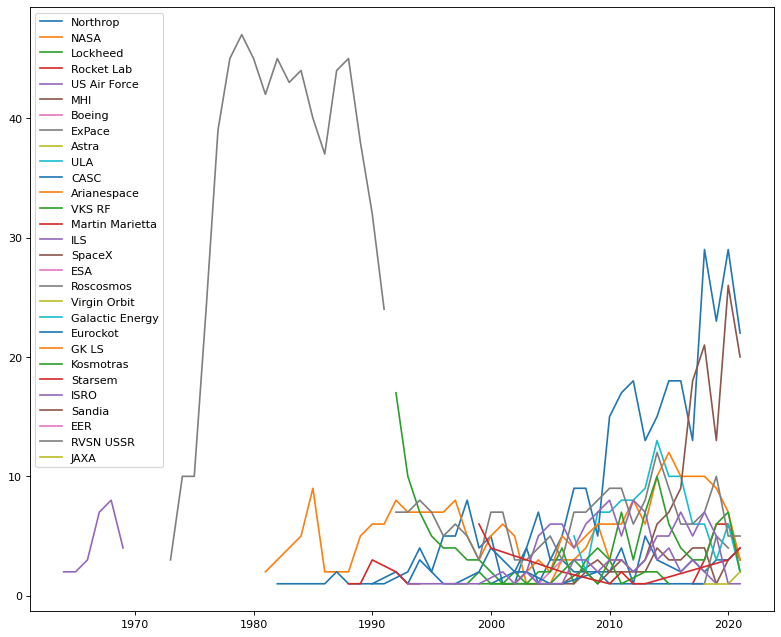

In [ ]:
org_set = set(org_launches['Organisation'])

plt.figure(figsize=(12, 10), dpi=80)
for org in org_set:
     selected_data = org_launches.loc[org_launches['Organisation'] == org]
     plt.plot(selected_data['year'], selected_data['counts'], label=org)
   
plt.legend()
plt.show()